In [0]:
# Classification of patients based off chronic kidney disease with Artificial Neural Network

In [0]:
import glob
from keras.models import Sequential, load_model

import numpy as np
import pandas as pd

from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as k
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [10]:
uploaded = files.upload()
df = pd.read_csv('kidney_disease.csv')

Saving kidney_disease.csv to kidney_disease.csv


In [11]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [12]:
df.shape

(400, 26)

In [0]:
# create a list for kept columns

In [0]:
column_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'classification']

In [0]:
df = df.drop([col for col in df.columns if not col in column_to_retain], axis=1)

In [22]:
df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,ckd
3,1.005,4.0,3.8,11.2,32,6700,3.9,yes,ckd
4,1.010,2.0,1.4,11.6,35,7300,4.6,no,ckd
5,1.015,3.0,1.1,12.2,39,7800,4.4,yes,ckd
7,1.015,2.0,1.1,12.4,44,6900,5,no,ckd


In [0]:
df = df.dropna(axis=0)

In [0]:
# transform non-numeric data

In [0]:
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [26]:
df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,26,65,30,1,0
3,1.005,4.0,3.8,11.2,14,55,15,1,0
4,1.010,2.0,1.4,11.6,17,61,23,0,0
5,1.015,3.0,1.1,12.2,21,65,21,1,0
7,1.015,2.0,1.1,12.4,26,57,27,0,0


In [0]:
# splitting data

In [0]:
X = df.drop(['classification'], axis=1)
y = df['classification']

In [0]:
# FEATURE SCALING

In [0]:
# feature scaling to make sure that values lie between 1 and 0
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns

X[column_names] = x_scaler.transform(X)

In [0]:
# split data 0.8 train 0.2 test data and shuffle

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [37]:
model = Sequential()

In [38]:
model.add(Dense(256, input_dim = len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))

model.add(Dense(1, activation='hard_sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# train model

In [41]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0])




Epoch 1/2000





190/190 [==============================] - 1s 3ms/step - loss: 0.6811 - acc: 0.5474
Epoch 2/2000
190/190 [==============================] - 0s 16us/step - loss: 0.6742 - acc: 0.5474
Epoch 3/2000
190/190 [==============================] - 0s 15us/step - loss: 0.6663 - acc: 0.5474
Epoch 4/2000
190/190 [==============================] - 0s 17us/step - loss: 0.6576 - acc: 0.5632
Epoch 5/2000
190/190 [==============================] - 0s 13us/step - loss: 0.6496 - acc: 0.5789
Epoch 6/2000
190/190 [==============================] - 0s 14us/step - loss: 0.6417 - acc: 0.5947
Epoch 7/2000
190/190 [==============================] - 0s 17us/step - loss: 0.6338 - acc: 0.6053
Epoch 8/2000
190/190 [==============================] - 0s 14us/step - loss: 0.6258 - acc: 0.6368
Epoch 9/2000
190/190 [==============================] - 0s 12us/step - loss: 0.6179 - acc: 0.6368
Epoch 10/2000
190/190 [==============================] - 0s 13us/step - loss: 0.6100 - acc: 0.6421
Epoch 11/200

In [0]:
# save the model
model.save('ckd.model')

Text(0.5, 0, 'epoch')

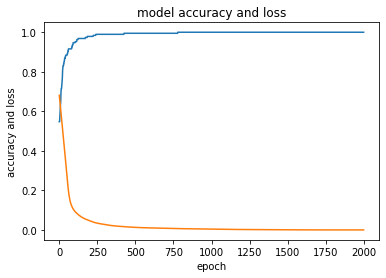

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [48]:
print('shape of train: ', X_train.shape)

shape of train:  (190, 8)


In [49]:
print('shape of test: ', X_test.shape)

shape of test:  (48, 8)


In [51]:
predictions = model.predict(X_test)
predictions

array([[0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.37829936],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.9764826 ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.97436357],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.   

In [0]:
predictions = [1 if y >= 0.5 else 0 for y in predictions]

In [56]:
predictions

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0]